In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'historic_demand_year_2024.csv'
data = pd.read_csv(file_path)

data.dropna(axis=1, how='all', inplace=True)
data.head()

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,scottish_transfer,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,viking_flow
0,2024-01-01,1,21783,23466,19539,2804,6488,0,16726,0,...,-71,417,-4,666,-179,-92,905,62,998,572
1,2024-01-01,2,22521,24103,20286,2834,6488,0,16726,0,...,288,430,-4,661,-60,-8,901,-15,998,575
2,2024-01-01,3,22194,24754,20070,2868,6488,0,16726,0,...,466,834,-4,661,-118,-1,807,-396,997,422
3,2024-01-01,4,21510,24505,19424,2901,6488,0,16726,0,...,262,839,-4,661,-270,-84,803,-473,997,401
4,2024-01-01,5,20619,23977,18674,2933,6488,0,16726,0,...,595,53,-5,661,-340,-103,537,-856,998,28


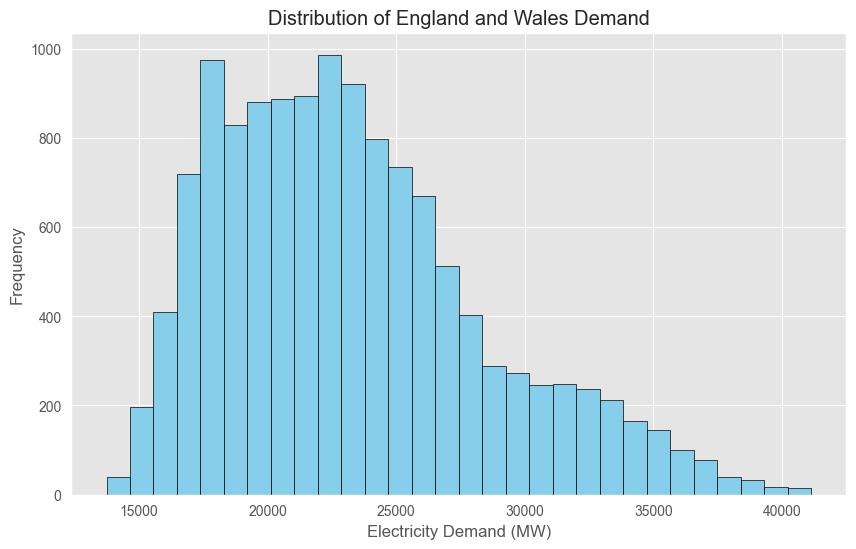

In [42]:
# 1. Histogram of England and Wales demand
plt.style.use('ggplot')
def plot_histogram_england_wales_demand(data):
    plt.figure(figsize=(10, 6))
    plt.hist(data['england_wales_demand'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of England and Wales Demand')
    plt.xlabel('Electricity Demand (MW)')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram_england_wales_demand(data)


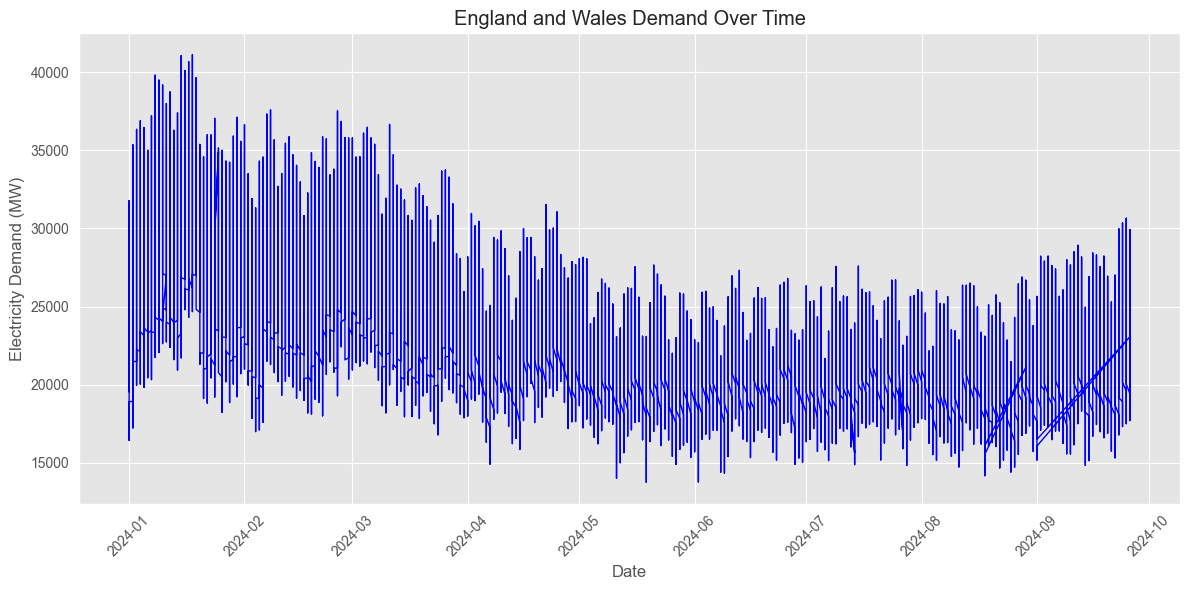

In [43]:
# 2. Line plot showing the England and Wales demand over time
def plot_line_england_wales_demand(data):
    plt.figure(figsize=(12, 6))
    plt.plot(pd.to_datetime(data['settlement_date']), data['england_wales_demand'], color='blue', linewidth=1)
    plt.title('England and Wales Demand Over Time')
    plt.xlabel('Date')
    plt.ylabel('Electricity Demand (MW)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
plot_line_england_wales_demand(data)

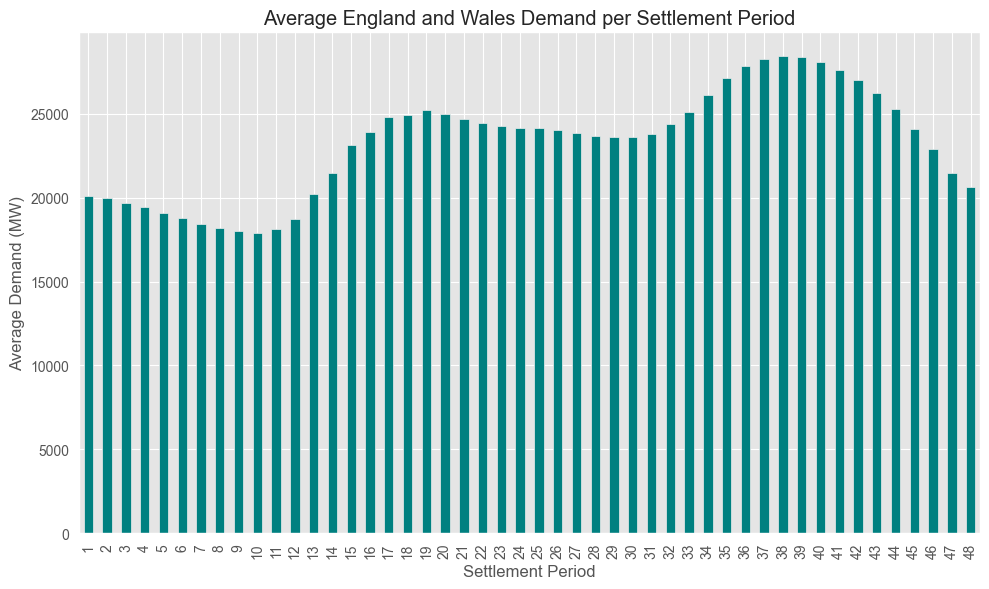

In [44]:
# 3. Bar Chart
def plot_bar_average_demand(data):
    plt.figure(figsize=(10, 6))
    avg_demand = data.groupby('settlement_period')['england_wales_demand'].mean()
    avg_demand.plot(kind='bar', color='teal')
    
    plt.title('Average England and Wales Demand per Settlement Period')
    plt.xlabel('Settlement Period')
    plt.ylabel('Average Demand (MW)')
    plt.tight_layout()
    plt.show()

plot_bar_average_demand(data)

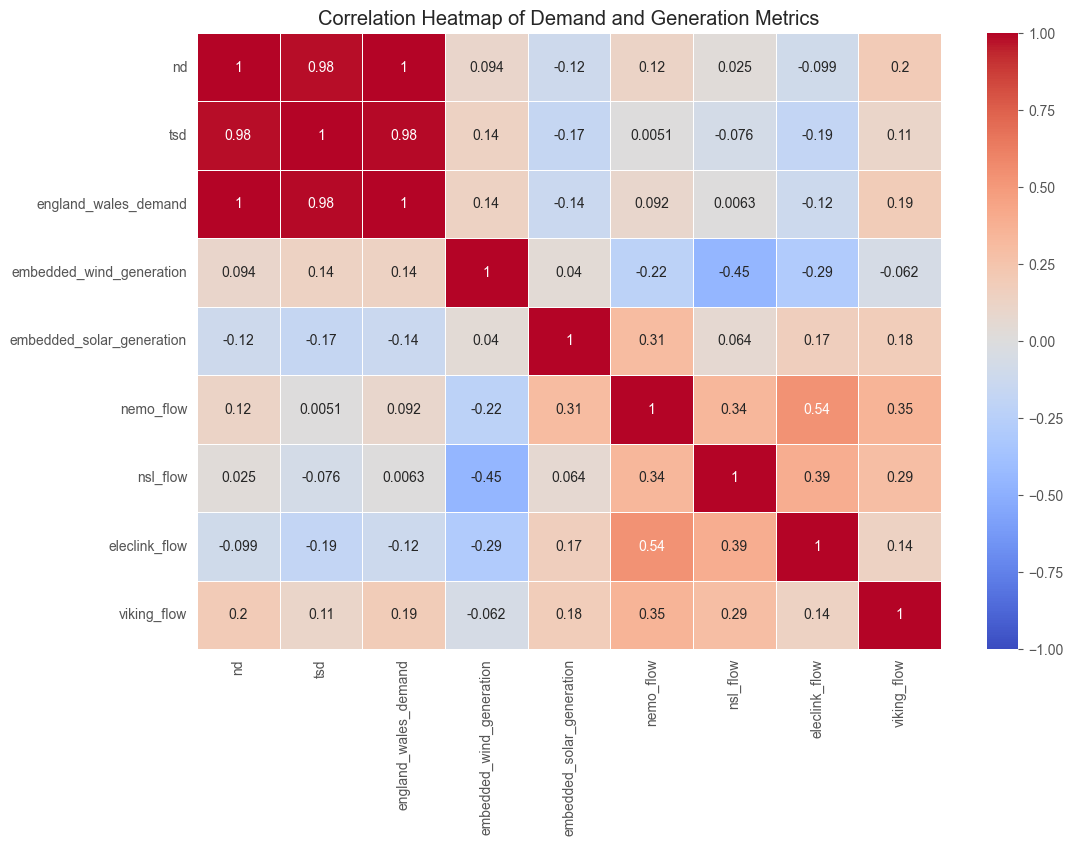

In [45]:
# 4. Heatmap of correlations between demand and generation columns
def plot_heatmap_correlations(data):
    plt.figure(figsize=(12, 8))
    relevant_columns = ['nd', 'tsd', 'england_wales_demand', 
                        'embedded_wind_generation', 'embedded_solar_generation',
                        'nemo_flow', 'nsl_flow', 'eleclink_flow', 'viking_flow']
    correlation_matrix = data[relevant_columns].corr()

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Correlation Heatmap of Demand and Generation Metrics')
    plt.show()

plot_heatmap_correlations(data)


In [49]:
# descriptive statistics
print("Descriptive Statistics:")
descriptive_stats = data.describe()
descriptive_stats = descriptive_stats.dropna(axis=1, how="all")
display(descriptive_stats.style.format("{:.2f}").set_caption("Descriptive Statistics").background_gradient(cmap="Blues", axis=None))

# correlation matrix
print("\nCorrelation Matrix:")
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
correlation_matrix = correlation_matrix.dropna(axis=1, how="all").dropna(axis=0, how="all")
display(correlation_matrix.style.format("{:.2f}").set_caption("Correlation Matrix").background_gradient(cmap="coolwarm", axis=None))

Descriptive Statistics:


,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,scottish_transfer,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,viking_flow
count,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00,12958.00
mean,24.50,25380.68,27363.54,23306.84,1840.57,6563.38,1847.37,17030.41,0.00,198.42,1789.21,1183.93,555.64,156.72,-295.26,-319.65,458.65,1113.38,800.84,349.41
std,13.85,5644.69,5439.37,5173.67,1169.79,34.83,2587.99,230.14,0.00,366.12,1887.07,734.34,468.02,684.32,218.69,247.69,602.73,588.27,377.38,740.20
min,1.00,15071.00,17138.00,13740.00,229.00,6488.00,0.00,16396.00,0.00,0.00,-2490.00,-2056.00,-872.00,-1079.00,-453.00,-532.00,-1022.00,-1453.00,-1024.00,-1456.00
25%,12.25,21021.25,23297.75,19295.00,905.00,6562.00,0.00,16887.00,0.00,8.00,298.25,985.00,-1.00,-332.00,-451.00,-528.00,55.00,1202.00,812.00,-94.00
50%,24.00,24621.00,26350.00,22568.50,1529.50,6562.00,157.00,17143.00,0.00,12.00,1577.00,1252.00,842.00,102.00,-382.00,-457.00,682.00,1397.00,996.00,419.50
75%,36.00,28552.50,30408.75,26174.50,2573.00,6563.00,3326.50,17193.00,0.00,170.00,3201.00,1842.00,991.00,852.00,-249.00,-58.00,999.00,1399.00,997.00,949.00
max,48.00,45202.00,47507.00,41130.00,5587.00,6622.00,11224.00,17197.00,0.00,1854.00,6585.00,2010.00,993.00,1066.00,400.00,504.00,1020.00,1400.00,1001.00,1436.00



Correlation Matrix:


,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,pump_storage_pumping,scottish_transfer,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,viking_flow
settlement_period,1.00,0.44,0.41,0.43,0.06,0.00,0.10,-0.00,-0.46,0.02,0.10,0.03,0.11,-0.11,-0.11,0.09,0.16,0.05,0.10
nd,0.44,1.00,0.98,1.00,0.09,-0.39,-0.12,-0.31,-0.41,0.12,0.09,-0.20,0.29,-0.04,0.04,0.12,0.03,-0.10,0.20
tsd,0.41,0.98,1.00,0.98,0.14,-0.41,-0.17,-0.32,-0.33,0.17,0.00,-0.25,0.20,-0.04,0.02,0.01,-0.08,-0.19,0.11
england_wales_demand,0.43,1.00,0.98,1.00,0.14,-0.39,-0.14,-0.31,-0.39,0.18,0.07,-0.22,0.26,-0.02,0.06,0.09,0.01,-0.12,0.19
embedded_wind_generation,0.06,0.09,0.14,0.14,1.00,-0.11,0.04,-0.13,0.22,0.76,-0.24,-0.26,-0.06,0.27,0.28,-0.22,-0.45,-0.29,-0.06
embedded_wind_capacity,0.00,-0.39,-0.41,-0.39,-0.11,1.00,0.12,0.07,-0.11,-0.11,0.07,0.08,-0.16,-0.09,-0.13,-0.02,0.24,0.15,-0.08
embedded_solar_generation,0.10,-0.12,-0.17,-0.14,0.04,0.12,1.00,0.18,-0.14,-0.17,0.05,0.20,0.34,-0.15,-0.15,0.31,0.06,0.17,0.18
embedded_solar_capacity,-0.00,-0.31,-0.32,-0.31,-0.13,0.07,0.18,1.00,-0.07,-0.25,0.07,0.51,-0.06,-0.13,-0.16,0.04,0.10,0.28,-0.06
pump_storage_pumping,-0.46,-0.41,-0.33,-0.39,0.22,-0.11,-0.14,-0.07,1.00,0.21,-0.22,-0.15,-0.07,0.12,0.09,-0.15,-0.37,-0.19,-0.10
scottish_transfer,0.02,0.12,0.17,0.18,0.76,-0.11,-0.17,-0.25,0.21,1.00,-0.20,-0.32,-0.20,0.37,0.35,-0.34,-0.36,-0.36,-0.06
